Responsável: Wender Carlos Pereira dos Santos

## **Sumário** <a id="imports"></a>

01. [Visão Geral dos Dados](#visao-geral)  
02. [Objetivo e Estrutura dos Dados](#objetivo)  
03. [Imports](#imports)  
04. [Importação Bases](#importacao)  
05. [Unificação das Bases](#unificacao)  
06. [Limpeza e Formatação](#limpeza)  
07. [Separação de Treino e Teste](#treino-teste)  
08. [Análise Exploratória dos Dados](#exploratoria)  
09. [Pré-Processamento](#pre-processamento)  
10. [Decisão do Modelo](#modelo)  
11. [Modelo Final com Otimização - Random Forest](#otimizacao)  
12. [Avaliação do Modelo na Base de Teste](#avaliacao)  
13. [Conclusão](#conclusao)

# **1 - Visão Geral dos Dados** <a id="visao-geral"></a>

A base de dados utilizada neste projeto foi extraída da plataforma Kaggle, a partir do dataset intitulado "One Piece IMDb Ratings and Votes", disponível no seguinte endereço:

🔗 One Piece IMDb Ratings and Votes

Este conjunto de dados reúne informações detalhadas sobre os episódios do anime One Piece, abrangendo dados como avaliações do público, número de votos, datas de exibição, títulos originais e traduzidos, arcos narrativos, duração e detalhes da equipe técnica envolvida (direção e roteiro).

Além disso, também foi utilizada a base de dados "One Piece Episode and Production Info", disponível em:

🔗 One Piece Episode and Production Info

Este conjunto de dados contém informações detalhadas sobre cada episódio do anime One Piece, com foco na produção e equipe envolvida. A base oferece uma visão detalhada sobre a criação e produção de cada episódio, proporcionando dados valiosos para a análise da equipe envolvida e a relação entre o conteúdo do mangá e a adaptação para o anime.



# **2 - Objetivo e Estrutura dos Dados** <a id="objetivo"></a>

O objetivo deste trabalho é analisar se há correlação entre a nota do IMDb e atributos dos episódios do anime One Piece, como a equipe envolvida no desenvolvimento, a duração dos arcos narrativos e outros fatores. Além disso, o trabalho visa o desenvolvimento de um modelo de aprendizado de máquina com o intuito de prever futuras avaliações dos episódios.

# **3 - Imports** <a id="*imports*"></a>




In [ ]:
# 📦 Manipulação de Dados
import pandas as pd
import numpy as np

# 📈 Visualização
from matplotlib import pyplot as plt
import seaborn as sns

# 🧹 Pré-processamento
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# 🔍 Modelagem e Validação
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# 📊 Métricas de Avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 💾 Salvamento de Modelos
import joblib
import pickle as cPickle

# ☁️ Acesso ao Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# ⚙️ Utilidades
import warnings

# Configurações do pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 300)

# Ignorar warnings
warnings.filterwarnings("ignore")

# **4 - Importação Bases** <a id="importacao"></a>

## 4.1 - Base: Ep_Rating

In [ ]:
# Set the path to the file you'd like to load
file_path_Ep_Rating = "complete_data_v01.csv"


# Load the latest version
Ep_Rating = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "greninja1729/one-piece-imdb-ratings-and-votes",
  file_path_Ep_Rating,
  pandas_kwargs={"sep": ","})

display(pd.DataFrame(Ep_Rating.columns, columns=["colunas"]))
display(Ep_Rating)

,colunas
0,ep_num
1,episode_japan_title
2,episode_english_title
3,air_date
4,arc
5,rating
6,votes
7,type
8,ep_duration
9,directors


,ep_num,episode_japan_title,episode_english_title,air_date,arc,rating,votes,type,ep_duration,directors,writers,synopsis
0,1,Ore wa Luffy! Kaizoku Ou ni Naru Otoko Da!,I'm Luffy! The Man Who's Gonna Be King of the Pirates!,"Oct 20, 1999",Romance Dawn Arc,8.4,23000,Manga Canon,24m,Kônosuke Uda,"Eiichirô Oda, Junki Takegami, Eric Vale","Alvida pirates plunder a ship only to find a barrel containing a strange boy names Luffy who is on a quest to find the legendary ""One Piece"" and become the King of Pirates."
1,2,Daikengo Arawaru! Kaizokugari Roronoa Zoro,Enter the Great Swordsman! Pirate Hunter Roronoa Zoro!,"Nov 17, 1999",Romance Dawn Arc,8.2,8600,Manga Canon,24m,"Tetsuji Nakamura, Kônosuke Uda","Eiichirô Oda, Michiru Shimada, Eric Vale","Luffy and Koby arrive at Shell Island where they meet Roronoa Zoro, a bounty hunter held under arrest by Captain Morgan."
2,3,Morgan vs. Luffy! Nazo no Bishoujo wa Dare?,Morgan vs. Luffy! Who's the Mysterious Pretty Girl?,"Nov 24, 1999",Romance Dawn Arc,7.9,4400,Manga Canon,25m,Kônosuke Uda,"Eiichirô Oda, Michiru Shimada, Eric Vale","Luffy convinces Zoro to join his crew, but they must defeat Captain Morgan first. Meanwhile, Koby is accepted as a marine."
3,4,Luffy no Kako! Akagami no Shanks Toujou,Luffy's Past! Enter Red-Haired Shanks!,"Dec 8, 1999",Orange Town Arc,8.3,4100,Manga Canon,24m,Kônosuke Uda,"Eiichirô Oda, Eric Vale, Junki Takegami",Luffy reflects on his past and how he came in possession of his Straw Hat.
4,5,Kyoufu Nazo no Chikara! Kaizoku Douke Buggy-senchou!,"A Terrifying Mysterious Power! Captain Buggy, the Clown Pirate!","Dec 15, 1999",Orange Town Arc,7.4,2700,Manga Canon,25m,Kônosuke Uda,"Eiichirô Oda, Eric Vale, Junki Takegami",Nami tricks Luffy into allowing her to turn him over to Buggy as a battle ensues.
...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1099,Preparations for Interception! Rob Lucci Strikes,Preparations for Interception! Rob Lucci Strikes!,"Mar 31, 2024",Egghead Arc,8.6,1600,Manga Canon,NaN,NaN,NaN,CP-0 makes a forced landing at Egghead and people on the Fabriophase are plunged into confusion while Shaka and the others prepare to fight back on the Labophase. The enraged Atlas stands up... Read all
1099,1100,Powers on a Different Level! Luffy vs. Lucci!,Powers on a Different Level! Luffy vs. Lucci!,"Apr 7, 2024",Egghead Arc,9.8,14000,Manga Canon,NaN,NaN,NaN,"Luffy transforms into the Warrior of Liberation as Rob Lucci also shows his awakened Devil Fruit form. As the two clash, Vegapunk reveals the shocking truth of the Gum-Gum Fruit and his eye-... Read all"
1100,1101,The Strongest Form of Humanity! The Seraphim's Powers,The Strongest Form of Humanity! The Seraphim's Powers!,"Apr 21, 2024",Egghead Arc,9.5,3300,Manga Canon,NaN,NaN,NaN,"Vegapunk describes how he managed to grant the Seraphim Devil Fruit powers, which surprises Franky and the others. Meanwhile, Luffy is still facing Lucci in his savage, awakened form, but th... Read all"
1101,1102,Sinister Schemes! The Operation to Escape Egghead,Sinister Schemes! The Operation to Escape Egghead,"Apr 28, 2024",Egghead Arc,8.1,930,Manga Canon,NaN,NaN,NaN,Vegapunk asks the Straw Hats to take him on board their ship which makes Franky and Usopp happy but annoys Nami. Lucci orders his troops to block off all Vegapunk's escape routes and looks t... Read all


Com o objetivo de facilitar a interpretação das variáveis durante o processo de análise, optei por elaborar um dicionário de dados em português, traduzindo as descrições das colunas presentes no dataset. Essa padronização contribuiu para uma melhor compreensão das informações e para a organização do trabalho ao longo das etapas do projeto.

In [ ]:
# Dicionário de dados
dictionary = {
    "episode_num": ("The overall episode number of the anime", "Número geral do episódio no anime"),
    "episode_japan_title": ("Japanese title of the episode", "Título japonês do episódio"),
    "episode_english_title": ("English title of the episode", "Título em inglês do episódio"),
    "air_date": ("The original Japanese air date of the episode", "Data original de exibição no Japão"),
    "arc": ("Arc to which the episode belongs", "Arco ao qual o episódio pertence"),
    "rating": ("IMDb rating of each episode", "Avaliação do episódio no IMDb"),
    "votes": ("Number of votes on each episode on IMDb", "Número de votos no IMDb para o episódio"),
    "type": ("Type of episode (Filler/Manga Canon/Mixed Canon-Filler)", "Tipo de episódio (Filler/Manga Canon/Mixed Canon-Filler)"),
    "ep_duration": ("Duration of the episode", "Duração do episódio"),
    "directors": ("Director of the episode", "Diretor(es) do episódio"),
    "writers": ("Writers of the episode", "Roteirista(s) do episódio"),
    "synopsis": ("Short description of the contents of the episode", "Descrição resumida do conteúdo do episódio")
}

# Criação do DataFrame a partir do dicionário
dict_df = pd.DataFrame(dictionary.items(), columns=["variavel", "info"])

# Separação da coluna "Info" em duas colunas: "Descrição" (primeiro valor da tupla) e "Categorias" (segundo valor da tupla)
dict_df["description"] = dict_df["info"].apply(lambda x: x[0])
dict_df["descricao"] = dict_df["info"].apply(lambda x: x[1])

# Remoção da coluna auxiliar "Info" que não será mais necessária
dict_df.drop(columns=["info"], inplace=True)

# Exibição do DataFrame
display(dict_df)

,variavel,description,descricao
0,episode_num,The overall episode number of the anime,Número geral do episódio no anime
1,episode_japan_title,Japanese title of the episode,Título japonês do episódio
2,episode_english_title,English title of the episode,Título em inglês do episódio
3,air_date,The original Japanese air date of the episode,Data original de exibição no Japão
4,arc,Arc to which the episode belongs,Arco ao qual o episódio pertence
5,rating,IMDb rating of each episode,Avaliação do episódio no IMDb
6,votes,Number of votes on each episode on IMDb,Número de votos no IMDb para o episódio
7,type,Type of episode (Filler/Manga Canon/Mixed Canon-Filler),Tipo de episódio (Filler/Manga Canon/Mixed Canon-Filler)
8,ep_duration,Duration of the episode,Duração do episódio
9,directors,Director of the episode,Diretor(es) do episódio


O objetivo dessa etapa foi realizar uma análise inicial dos dados da tabela para compreender a sua estrutura e qualidade. As verificações realizadas são fundamentais para entender como os dados estão distribuídos e se há problemas que precisam ser tratados antes de qualquer análise mais profunda.

In [ ]:
# Passo 1: Exibir o count de cada coluna
count = Ep_Rating.count()

# Passo 2: Exibir o distinct count (número de valores únicos) de cada coluna
distinct_count = Ep_Rating.nunique()

# Passo 3: Contar o número de valores ausentes (missing) em cada coluna
missing = Ep_Rating.isnull().sum()

# Passo 4: Contar o número de valores zero em cada coluna
zeros = Ep_Rating.eq(0).sum()

# Passo 5: Calcular o percentual de distinct count sobre o count
percent_distinct = (distinct_count / count) * 100

# Passo 6: Criar um DataFrame com todas as métricas
result = pd.DataFrame({
    'Count': count,
    'Distinct Count': distinct_count,
    'Missing': missing,
    'Zeros': zeros,
    'Percentual Distinct': percent_distinct
})

# Exibir o resultado
print(result)

                       Count  Distinct Count  Missing  Zeros  Percentual Distinct
ep_num                  1103            1103        0      0           100.000000
episode_japan_title     1103            1103        0      0           100.000000
episode_english_title   1103            1103        0      0           100.000000
air_date                1103            1081        0      0            98.005440
arc                     1103              54        0      0             4.895739
rating                  1103              46        0      0             4.170444
votes                   1103             416        0      0            37.715322
type                    1103               4        0      0             0.362647
ep_duration              202               5      901      0             2.475248
directors                705              70      398      0             9.929078
writers                  383              27      720      0             7.049608
synopsis        

Após a análise inicial dos dados, a próxima etapa envolveu a validação dos tipos de dados de cada coluna. Isso é crucial porque, em muitos casos, as variáveis podem ser carregadas com tipos incorretos durante a leitura dos dados, o que pode gerar problemas durante a análise e modelagem.

In [ ]:
#Remoção das informações que não iremos utilizar

Ep_Rating = Ep_Rating.drop(columns=['episode_japan_title', 'episode_english_title', 'ep_duration', 'writers', 'synopsis','directors'])

# Validação e Conversão de Variaveis

Ep_Rating['air_date'] = pd.to_datetime(Ep_Rating['air_date'], format='%b %d, %Y', errors='coerce')

#Correção da Coluna Episodio - Visar relacionar as duas tabelas por esta coluna
Ep_Rating["ep_num"] = Ep_Rating["ep_num"].astype(str)

pd.DataFrame.info(Ep_Rating)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ep_num    1103 non-null   object        
 1   air_date  1103 non-null   datetime64[ns]
 2   arc       1103 non-null   object        
 3   rating    1103 non-null   float64       
 4   votes     1103 non-null   int64         
 5   type      1103 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.8+ KB


## 4.2 - Base: Ep_Product

In [ ]:
# Set the path to the file you'd like to load
file_path_Ep_Product = "onepiece_episode.csv"


# Load the latest version
Ep_Product = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kimmypracha/one-piece-episode-and-production-info",
  file_path_Ep_Product,
  pandas_kwargs={"sep": "\t"})

display(pd.DataFrame(Ep_Product.columns, columns=["colunas"]))
display(Ep_Product)

,colunas
0,Unnamed: 0
1,Kanji
2,Romaji
3,Title
4,Screenplay
5,Art
6,Animation
7,Direction
8,Chapters
9,Episode_num


,Unnamed: 0,Kanji,Romaji,Title,Screenplay,Art,Animation,Direction,Chapters,Episode_num
0,0,ロビン解放！ルフィ対ルッチ頂上決戦,Robin Kaihō! Rufi tai Rucchi chōjō kessen,Robin's Liberation! Luffy vs. Lucci: Peak of the Decisive Battle,古賀直樹 - Koga Naoki,佐藤美幸 - Miyuki Sato ::: 千田国広 - Kunihiro Senda,小林ゆかり - Yukari Kobayashi ::: 鈴木伸一 - Shinichi Suzuki,清水明 - Akira Shimizu,420 p.6-19 ::: 421 p.2,Episode 302
1,1,トナカイは青っ鼻！チョッパーの秘密,Tonakai wa Aoppana! Choppā no Himitsu!,The Blue-Nosed Reindeer! Chopper's Secret,島田満 - Michiru Shimada,佐藤美幸 - Miyuki Sato,久田和也 - Kazuya Hisada,西尾大介 - Daisuke Nishio,139 (pp. 12-19) ::: 140 (pp. 3-18),Episode 84
2,2,砂漠の海賊団登場！自由に生きる男達,Sabaku no kaizokudan tōjō! Jiyū ni ikiru otokotachi,Here Come the Desert Pirates! The Men Who Live Free,武上純希 - Junki Takegami,佐藤美幸 - Miyuki Sato ::: 川崎美千代 - Michiyo Kawasaki,高木雅之 - Masayuki Takagi,西尾大介 - Daisuke Nishio,Chapter 162 (p. 15-16) :::,Episode 98
3,3,逆転大脱出への鍵！ドルドルボール！,Gyakuden dai dasshutsu e no kagi! Dorudoru Bōru!,The Key to Turning the Tide and a Great Escape! Doru Doru Ball!,武上純希 - Junki Takegami,佐藤美幸 - Miyuki Sato,高木雅之 - Masayuki Takagi,西尾大介 - Daisuke Nishio,Chapter 175 (p. 2-19) ::: Chapter 176 (p. 2-14) :::,Episode 109
4,4,始まりはあの日！ビビが語る冒険譚,Hajimaru wa ano hi! Bibi ga kataru bōkendan,Everything Began That Day! Vivi Tells of her Adventures!,菅良幸 - Yoshiyuki Suga,佐藤美幸 - Miyuki Sato ::: 内川文広 - Fumihiro Uchikawa,久田和也 - Kazuya Hisada,西尾大介 - Daisuke Nishio,Chapter 215 (p. 2-19) ::: Chapter 216 (p. 2-19) :::,Episode 129
...,...,...,...,...,...,...,...,...,...,...
1030,1046,鬼ヶ島激動 ルフィ全面戦争開始,Onigashima Gekidō - Rufi Zenmen Sensō Kaishi,Onigashima in Tumult - Luffy's All-Out War Begins,山崎亮 - Ryo Yamazaki,土居ゆりの - Yurino Doi,久田和也 - Kazuya Hisada,中島豊 - Yutaka Nakashima,Chapter 987 (p. 3-14) :::,Episode 996
1031,1047,運命の出会い キュロスとリク王,Unmei no Deai - Kyurosu to Riku Ō,A Fateful Encounter — Kyros and King Riku,NaN,NaN,NaN,NaN,Chapter 741 (p. 14-19) ::: Chapter 742 (p. 2-8),Episode 675
1032,1048,伝説復活! キュロス渾身の一撃,Densetsu Fukkatsu! Kyurosu Konshin no Ichigeki,The Legend is Back! Kyros' All-out Blow,NaN,NaN,NaN,NaN,Chapter 743 (p. 2-16) :::,Episode 677
1033,1049,火拳炸裂! 復活メラメラの実の力,Hiken Sakuretsu! Fukkatsu Mera Mera no Mi no Chikara,The Fire Fist Strikes! The Power of the Mera Mera no Mi Returns,NaN,NaN,NaN,NaN,Chapter 744 p. 2-11,Episode 678


Com o objetivo de facilitar a interpretação das variáveis durante o processo de análise, optei por elaborar um dicionário de dados em português, traduzindo as descrições das colunas presentes no dataset. Essa padronização contribuiu para uma melhor compreensão das informações e para a organização do trabalho ao longo das etapas do projeto.

In [ ]:
# Dicionário de dados
dictionary = {
    "Kanji": ("Contain the title name of the episode in Japanese", "Contém o nome do título do episódio em japonês"),
    "Romaji": ("Contain the title name of the episode in Romaji", "Contém o nome do título do episódio em Romaji"),
    "Title": ("The title of the episode", "O título do episódio"),
    "Screenplay": ("The person who is responsible for the screenplay of that episode", "A pessoa responsável pelo roteiro do episódio"),
    "Art": ("The person/people who is/are responsible for the art of that episode", "A(s) pessoa(s) responsável(is) pela arte do episódio"),
    "Animation": ("The person/people who is/are responsible for the key animation of that episode", "A(s) pessoa(s) responsável(is) pela animação chave do episódio"),
    "Direction": ("The person/people who is/are the director(s) of that episode", "A(s) pessoa(s) responsável(is) pela direção do episódio"),
    "Chapter": ("The page in manga chapter that this episode covered", "A página do capítulo do mangá que este episódio cobriu"),
    "Episode_num": ("The episode number / The name of the episode", "O número do episódio / O nome do episódio")
}

# Criação do DataFrame a partir do dicionário
dict_df = pd.DataFrame(dictionary.items(), columns=["variavel", "info"])

# Separação da coluna "Info" em duas colunas: "Descrição" (primeiro valor da tupla) e "Categorias" (segundo valor da tupla)
dict_df["description"] = dict_df["info"].apply(lambda x: x[0])
dict_df["descricao"] = dict_df["info"].apply(lambda x: x[1])

# Remoção da coluna auxiliar "Info" que não será mais necessária
dict_df.drop(columns=["info"], inplace=True)

# Exibição do DataFrame
display(dict_df)


,variavel,description,descricao
0,Kanji,Contain the title name of the episode in Japanese,Contém o nome do título do episódio em japonês
1,Romaji,Contain the title name of the episode in Romaji,Contém o nome do título do episódio em Romaji
2,Title,The title of the episode,O título do episódio
3,Screenplay,The person who is responsible for the screenplay of that episode,A pessoa responsável pelo roteiro do episódio
4,Art,The person/people who is/are responsible for the art of that episode,A(s) pessoa(s) responsável(is) pela arte do episódio
5,Animation,The person/people who is/are responsible for the key animation of that episode,A(s) pessoa(s) responsável(is) pela animação chave do episódio
6,Direction,The person/people who is/are the director(s) of that episode,A(s) pessoa(s) responsável(is) pela direção do episódio
7,Chapter,The page in manga chapter that this episode covered,A página do capítulo do mangá que este episódio cobriu
8,Episode_num,The episode number / The name of the episode,O número do episódio / O nome do episódio


Após a análise inicial dos dados, a próxima etapa envolveu a validação dos tipos de dados de cada coluna. Isso é crucial porque, em muitos casos, as variáveis podem ser carregadas com tipos incorretos durante a leitura dos dados, o que pode gerar problemas durante a análise e modelagem.

In [ ]:
#Remoção das informações que não iremos utilizar
Ep_Product = Ep_Product.drop(columns=['Kanji', 'Romaji', 'Title', 'Chapters', 'Unnamed: 0'])

#Correção da Coluna Episodio - Visar relacionar as duas tabelas por esta coluna
Ep_Product["Episode_num"] = Ep_Product["Episode_num"].astype(str).str.extract(r'(\d+)', expand=False)

#Remoção dos Nulos da Coluna Episode

Ep_Product = Ep_Product[Ep_Product["Episode_num"].notna()]

# Passo 1: Exibir o count de cada coluna
count = Ep_Product.count()

# Passo 2: Exibir o distinct count (número de valores únicos) de cada coluna
distinct_count = Ep_Product.nunique()

# Passo 3: Contar o número de valores ausentes (missing) em cada coluna
missing = Ep_Product.isnull().sum()

# Passo 4: Contar o número de valores zero em cada coluna
zeros = Ep_Product.eq(0).sum()

# Passo 5: Calcular o percentual de distinct count sobre o count
percent_distinct = (distinct_count / count) * 100

# Passo 6: Criar um DataFrame com todas as métricas
result = pd.DataFrame({
    'Count': count,
    'Distinct Count': distinct_count,
    'Missing': missing,
    'Zeros': zeros,
    'Percentual Distinct': percent_distinct
})

# Exibir o resultado
print(result)

             Count  Distinct Count  Missing  Zeros  Percentual Distinct
Screenplay    1022              23       10      0             2.250489
Art           1027              59        5      0             5.744888
Animation     1028             106        4      0            10.311284
Direction     1028              66        4      0             6.420233
Episode_num   1032            1031        0      0            99.903101


Após a análise inicial dos dados, a próxima etapa envolveu a validação dos tipos de dados de cada coluna. Isso é crucial porque, em muitos casos, as variáveis podem ser carregadas com tipos incorretos durante a leitura dos dados, o que pode gerar problemas durante a análise e modelagem.

In [ ]:
pd.DataFrame.info(Ep_Product)

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 0 to 1034
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Screenplay   1022 non-null   object
 1   Art          1027 non-null   object
 2   Animation    1028 non-null   object
 3   Direction    1028 non-null   object
 4   Episode_num  1032 non-null   object
dtypes: object(5)
memory usage: 48.4+ KB


# **5 - Unificação das Bases** <a id="unificacao"></a>



## 5.1 - Join na Base de Dados

Nesta etapa, as duas bases de dados relacionadas aos episódios do anime One Piece são unificadas, visando integrar as informações sobre os episódios e sua produção. A fusão dos dados tem como objetivo criar um único conjunto de dados, que facilita a análise e a geração do relatório.

In [ ]:
# Agrupar as duas tabelas e ordenar por episodio
EP_Complete = pd.merge(Ep_Rating, Ep_Product, left_on="ep_num", right_on="Episode_num", how="inner")

# Converte variaveis para versão final
EP_Complete["ep_num"] = EP_Complete["ep_num"].astype(int)

#Padronização dos arcos

EP_Complete['arc'] = EP_Complete['arc'].str.replace(r'(?i)\s*part\s*\d+', '', regex=True).str.strip()

# Agora ordena
EP_Complete = EP_Complete.sort_values(by="ep_num")

# Converte a coluna air_date para o formato datetime
EP_Complete["air_date"] = pd.to_datetime(EP_Complete["air_date"])

# Extrai o ano da coluna air_date e cria a nova coluna 'year'
EP_Complete["Ano_Lancamento"] = EP_Complete["air_date"].dt.year.astype(str)

# Manter apenas uma coluna de Episodio
EP_Complete = EP_Complete.drop(columns=["Episode_num", "air_date"])

# Exibir resultado ordenado
print(EP_Complete.head(5))

   ep_num               arc  rating  votes         type             Screenplay                    Art               Animation                Direction Ano_Lancamento
0       1  Romance Dawn Arc     8.4  23000  Manga Canon  武上純希 - Junki Takegami  吉田智子 - Tomoko Yoshida    久田和也 - Kazuya Hisada     宇田鋼之介 - Kōnosuke Uda           1999
1       2  Romance Dawn Arc     8.2   8600  Manga Canon  島田満 - Michiru Shimada     佐藤美幸 - Miyuki Sato     井上栄作 - Eisaku Inoue  中村哲治 - Tetsuji Nakamura           1999
2       3  Romance Dawn Arc     7.9   4400  Manga Canon  島田満 - Michiru Shimada  吉田智子 - Tomoko Yoshida   横山健次 - Kenji Yokoyama   門田英彦 - Hidehiko Kadota           1999
3       4   Orange Town Arc     8.3   4100  Manga Canon  武上純希 - Junki Takegami  千田国広 - Kunihiro Senda  高木雅之 - Masayuki Takagi     境宗久 - Munehisa Sakai           1999
4       5   Orange Town Arc     7.4   2700  Manga Canon  武上純希 - Junki Takegami  吉田智子 - Tomoko Yoshida    袴田裕二 - Yuji Hakamada    藤瀬順一 - Junichi Fujise           1999


## 5.2 - Categorias para Estudo

Para aprimorar a análise, foram criadas duas novas colunas: duração do arco e período do arco. Essas variáveis foram adicionadas com o objetivo de investigar possíveis influências do tempo de exposição e da época de exibição de cada arco narrativo sobre a avaliação dos episódios no IMDb.

In [ ]:
# Agrupar por arco e contar quantos episódios tem cada um
arcos_episodios = EP_Complete.groupby('arc')['ep_num'].count().reset_index()

# Renomear colunas para deixar mais claro
arcos_episodios.columns = ['arc', 'qtd_ep']

# Ordenar do maior para o menor
arcos_episodios = arcos_episodios.sort_values(by='qtd_ep', ascending=False)

# Função simples para classificar
def classificar_arco(qtd):
    if qtd <= 4:
        return 'Curto'
    elif qtd <= 30:
        return 'Médio'
    elif qtd <= 60:
        return 'Longo'
    else:
        return 'Muito Longo'

# Aplicando a função linha a linha
arcos_episodios['Definicao_Arco'] = arcos_episodios['qtd_ep'].apply(classificar_arco)

# Exibir a tabela
print(arcos_episodios)

                        arc  qtd_ep Definicao_Arco
43         Wano Country Arc     137    Muito Longo
7             Dressrosa Arc     118    Muito Longo
47    Whole Cake Island Arc      95    Muito Longo
10      Fish-Man Island Arc      52          Longo
9           Enies Lobby Arc      49          Longo
30          Punk Hazard Arc      47          Longo
41        Thriller Bark Arc      45          Longo
37              Skypiea Arc      43          Longo
1              Arabasta Arc      39          Longo
45              Water 7 Arc      37          Longo
24           Marineford Arc      33          Longo
15           Impel Down Arc      31          Longo
49                  Zou Arc      29          Médio
29             Post-War Arc      27          Médio
35  Sabaody Archipelago Arc      21          Médio
2           Arlong Park Arc      15          Médio
0           Amazon Lily Arc      14          Médio
8           Drum Island Arc      14          Médio
28     Post-Enies Lobby Arc    

In [ ]:
# Juntar de volta ao dataframe original
EP_Complete = EP_Complete.merge(arcos_episodios[['arc', 'Definicao_Arco']], on='arc', how='left')

In [ ]:
def definir_posicao(grupo):
    tamanho = len(grupo)
    definicao = grupo['Definicao_Arco'].iloc[0]

    # Para arcos curtos: só Início e Fim
    if definicao == 'Curto':
        if tamanho == 1:
            return ['Conclusão']
        else:
            return ['Introdução'] + ['Conclusão'] * (tamanho - 1)

    # Para os demais: início, desenvolvimento, fim
    else:
        posicoes = []
        for idx in range(tamanho):
            proporcao = idx / tamanho
            if proporcao < 1/3:
                posicoes.append('Introdução')
            elif proporcao < 2/3:
                posicoes.append('Desenvolvimento')
            else:
                posicoes.append('Conclusão')
        return posicoes

# Aplicando a lógica agrupando por arco e ordenando
EP_Complete = EP_Complete.sort_values(by=['arc', 'ep_num']).copy()
EP_Complete['Classificao_Episodio'] = EP_Complete.groupby('arc').apply(definir_posicao).explode().values

In [ ]:
print(EP_Complete.head(5))

     ep_num              arc  rating  votes         type                Screenplay                    Art                  Animation               Direction Ano_Lancamento Definicao_Arco Classificao_Episodio
407     408  Amazon Lily Arc     7.6    723  Manga Canon  上坂浩彦 - Hirohiko Kamisaka  白石美穂 - Miho Shiraishi     出口としお - Toshio Deguchi   上田芳裕 - Yoshihiro Ueda           2009          Médio           Introdução
408     409  Amazon Lily Arc     7.7    763  Manga Canon      田中仁 - Hitoshi Tanaka  吉池隆司 - Ryūji Yoshiike          井手武生  - Takeo Ide    所勝美 - Katsumi Tokoro           2009          Médio           Introdução
409     410  Amazon Lily Arc     7.7    767  Manga Canon      菅良幸 - Yoshiyuki Suga     佐藤美幸 - Miyuki Sato  新垣重文 - Shigefumi Shingaki  中島豊 - Yutaka Nakashima           2009          Médio           Introdução
410     411  Amazon Lily Arc     7.8    868  Manga Canon      田中仁 - Hitoshi Tanaka  白石美穂 - Miho Shiraishi           舘直樹 - Naoki Tate   中尾幸彦 - Yukihiko Nakao           2

# **6 - Limpeza e Formatação** <a id="limpeza"></a>

Visando a base completa de informações, foi realizada uma nova avaliação dos dados compilados, incluindo a verificação dos tipos das colunas carregadas, assegurando que estão prontas para o estudo, além da análise da qualidade dos dados inseridos.

In [ ]:
pd.DataFrame.info(EP_Complete);

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 407 to 778
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ep_num                1030 non-null   int64  
 1   arc                   1030 non-null   object 
 2   rating                1030 non-null   float64
 3   votes                 1030 non-null   int64  
 4   type                  1030 non-null   object 
 5   Screenplay            1021 non-null   object 
 6   Art                   1026 non-null   object 
 7   Animation             1026 non-null   object 
 8   Direction             1026 non-null   object 
 9   Ano_Lancamento        1030 non-null   object 
 10  Definicao_Arco        1030 non-null   object 
 11  Classificao_Episodio  1030 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 104.6+ KB


In [ ]:
# Passo 1: Exibir o count de cada coluna
count = EP_Complete.count()

# Passo 2: Exibir o distinct count (número de valores únicos) de cada coluna
distinct_count = EP_Complete.nunique()

# Passo 3: Contar o número de valores ausentes (missing) em cada coluna
missing = EP_Complete.isnull().sum()

# Passo 4: Contar o número de valores zero em cada coluna
zeros = EP_Complete.eq(0).sum()

# Passo 5: Calcular o percentual de distinct count sobre o count
percent_distinct = (distinct_count / count) * 100

# Passo 6: Criar um DataFrame com todas as métricas
result = pd.DataFrame({
    'Count': count,
    'Distinct Count': distinct_count,
    'Missing': missing,
    'Zeros': zeros,
    'Percentual Distinct': percent_distinct
})

# Exibir o resultado
print(result)

                      Count  Distinct Count  Missing  Zeros  Percentual Distinct
ep_num                 1030            1030        0      0           100.000000
arc                    1030              50        0      0             4.854369
rating                 1030              46        0      0             4.466019
votes                  1030             399        0      0            38.737864
type                   1030               4        0      0             0.388350
Screenplay             1021              23        9      0             2.252693
Art                    1026              59        4      0             5.750487
Animation              1026             104        4      0            10.136452
Direction              1026              65        4      0             6.335283
Ano_Lancamento         1030              24        0      0             2.330097
Definicao_Arco         1030               4        0      0             0.388350
Classificao_Episodio   1030 

Para garantir o uso da maior volumetria possível de dados no treinamento do modelo e permitir uma análise mais robusta das correlações entre variáveis, foi realizada uma etapa de tratamento dos valores ausentes. O objetivo foi mitigar o impacto de dados não localizados, evitando perdas desnecessárias de registros relevantes para o estudo.

In [ ]:
EP_Complete['Screenplay'].fillna("Não Definido", inplace=True)
EP_Complete['Art'].fillna("Não Definido", inplace=True)
EP_Complete['Animation'].fillna("Não Definido", inplace=True)
EP_Complete['Direction'].fillna("Não Definido", inplace=True)

# **7 - Separação de Treino e Teste** <a id="treino-teste"></a>

Para avaliar o desempenho do modelo de forma justa e evitar sobreajuste, o conjunto de dados foi dividido em treino e teste, permitindo treinar o algoritmo com uma parte dos dados e validar sua performance com dados nunca vistos.

In [ ]:
#Realizamos a divisão dos dados em treino e teste

X = EP_Complete.drop(columns=["rating"])  # Treino(80%)
y = EP_Complete["rating"]  # Teste (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora sim, criar os DataFrames EP_train e EP_test para aplicar as transformações
EP_train = X_train.copy()
EP_test = X_test.copy()

# Exibir tamanhos das divisões
print(f"Tamanho do treino: {X_train.shape[0]}")
print(f"Tamanho do teste: {X_test.shape[0]}")

EP_train = pd.concat([X_train,y_train],axis= 1)
EP_train.shape

Tamanho do treino: 824
Tamanho do teste: 206


(824, 12)

# **8 - Análise Exploratória dos Dados** <a id="exploratoria"></a>

A fim de entender a correlação entre as variáveis, elas foram divididas em duas categorias: numéricas e categóricas. Essa separação é essencial para aplicar métodos de análise adequados a cada tipo de dado — como o coeficiente de correlação para variáveis numéricas e testes de associação para variáveis categóricas — possibilitando identificar padrões e relações relevantes que possam influenciar a nota dos episódios.

In [ ]:
# separando em listas: variáveis numéricas e categóricas
num_vars = EP_train.select_dtypes(include=['number']).columns.tolist()  # Seleciona as colunas com tipo numérico
cat_vars = EP_train.select_dtypes(exclude=['number']).columns.tolist()  # Seleciona as colunas que não são numéricas (categóricas)

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)  # Imprime as variáveis numéricas
print("Variáveis Categóricas:", cat_vars)  # Imprime as variáveis categóricas
print("Qtd Variáveis Numéricas:", len(num_vars))  # Imprime a quantidade de variáveis numéricas
print("Qtd Variáveis Categóricas:", len(cat_vars))  # Imprime a quantidade de variáveis categóricas

Variáveis Numéricas: ['ep_num', 'votes', 'rating']
Variáveis Categóricas: ['arc', 'type', 'Screenplay', 'Art', 'Animation', 'Direction', 'Ano_Lancamento', 'Definicao_Arco', 'Classificao_Episodio']
Qtd Variáveis Numéricas: 3
Qtd Variáveis Categóricas: 9


## 8.1 - Variáveis Numéricas: Avaliação

Para compreender o comportamento das variáveis numéricas, foi realizada uma análise descritiva com a exibição de estatísticas como média, mediana, desvio padrão e percentis (1%, 25%, 75% e 99%). Essa abordagem permite identificar a distribuição dos dados, possíveis outliers e padrões que possam influenciar os resultados do modelo.

In [ ]:
EP_train[num_vars].describe(percentiles = [0.01,0.25,0.75, 0.99])

,ep_num,votes,rating
count,824.000000,824.000000,824.000000
mean,520.940534,1742.251214,8.023908
std,295.910326,3362.088038,0.845831
min,1.000000,446.000000,5.200000
1%,9.230000,471.460000,5.823000
25%,268.750000,647.500000,7.500000
50%,519.500000,878.000000,7.900000
75%,773.250000,1900.000000,8.700000
99%,1016.770000,16310.000000,9.600000
max,1030.000000,54000.000000,9.800000


Realizando uma análise de correlação entre as variáveis numéricas do nosso dataset por meio de um heatmap. Essa etapa é fundamental para entender o grau de relação entre as variáveis, identificar possíveis redundâncias e garantir que as variáveis selecionadas para o modelo tenham relevância e variabilidade suficiente. A identificação de variáveis altamente correlacionadas pode indicar a necessidade de redução de dimensionalidade ou eliminação de colinearidades.

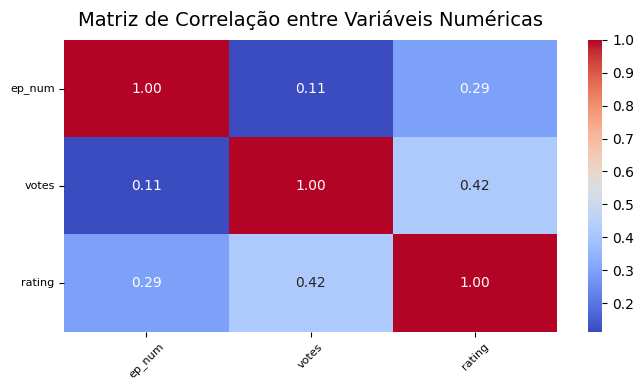

In [ ]:
plt.figure(figsize=(7, 4))

# Heatmap com título e rótulos ajustados
ax = sns.heatmap(
    EP_train[num_vars].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

# Tamanho do título
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=14, pad=10)

# Tamanho dos rótulos dos eixos x e y
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

No Dataset nota-se que não possui nenhuma correlação relevante sendo a maior de 0,42 entre votos e rating.

## 8.2 - Variáveis Categóricas: Avaliação

In [ ]:
# 1. **Contagem de categorias**
print("Contagem de categorias:")
for col in cat_vars:
    print(f"\n{col} - Contagem: {EP_train[col].nunique()}")
    print(EP_train[col].value_counts().head())

Contagem de categorias:

arc - Contagem: 50
arc
Wano Country Arc         112
Dressrosa Arc             99
Whole Cake Island Arc     73
Enies Lobby Arc           43
Fish-Man Island Arc       39
Name: count, dtype: int64

type - Contagem: 4
type
Manga Canon           700
Filler                 72
Mixed Canon/Filler     35
Anime Canon            17
Name: count, dtype: int64

Screenplay - Contagem: 23
Screenplay
上坂浩彦 - Hirohiko Kamisaka    141
田中仁 - Hitoshi Tanaka        117
菅良幸 - Yoshiyuki Suga        112
中山智博 - Tomohiro Nakayama     89
米村正二 - Shōji Yonemura        78
Name: count, dtype: int64

Art - Contagem: 55
Art
白石美穂 - Miho Shiraishi                              185
吉池隆司 - Ryūji Yoshiike                              176
佐藤美幸 - Miyuki Sato                                  52
佐藤美幸 - Miyuki Sato ::: 川崎美千代 - Michiyo Kawasaki     50
佐藤美幸 - Miyuki Sato ::: 福澤久美子 - Kumiko Fukuzawa      42
Name: count, dtype: int64

Animation - Contagem: 92
Animation
横山健次 - Kenji Yokoyama     101
高木雅之 - Masa

In [ ]:
# 2. **Nota média por categoria**
print("\nMédia de nota por categoria:")
for col in cat_vars:
    media = EP_train.groupby(col)['rating'].mean().sort_values(ascending=False)
    print(f"\nTOP 10 Rating por: {col}")
    print(media.head(10))


Média de nota por categoria:

TOP 10 Rating por: arc
arc
Marineford Arc             9.200000
Wano Country Arc           8.548214
Whole Cake Island Arc      8.545205
Sabaody Archipelago Arc    8.530769
Return to Sabaody Arc      8.466667
Dressrosa Arc              8.337374
Romance Dawn Arc           8.166667
Baratie Arc                8.122222
Amazon Lily Arc            8.100000
Arlong Park Arc            8.075000
Name: rating, dtype: float64

TOP 10 Rating por: type
type
Manga Canon           8.220000
Mixed Canon/Filler    7.594286
Anime Canon           7.270588
Filler                6.504167
Name: rating, dtype: float64

TOP 10 Rating por: Screenplay
Screenplay
井上亜樹子 - Akiko Inoue         8.594737
藤田伸三 - Shinzō Fujita        8.550000
山崎亮 - Ryo Yamazaki          8.400000
三浦希紗 - Kisa Miura           8.342857
米村正二 - Shōji Yonemura       8.298718
中山智博 - Tomohiro Nakayama    8.240449
冨岡淳広 - Atsuhiro Tomioka     8.123810
田中仁 - Hitoshi Tanaka        8.095726
菅良幸 - Yoshiyuki Suga        7.99

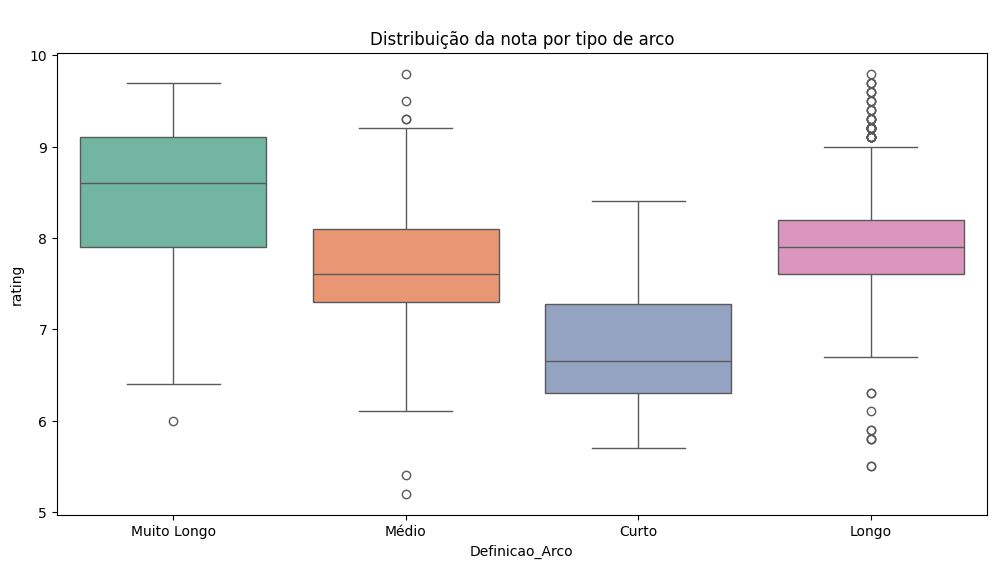

In [ ]:
# 3. **Boxplots para comparar a distribuição das notas por categoria**
plt.figure(figsize=(12, 6))
sns.boxplot(data=EP_train, x="Definicao_Arco", y="rating", palette="Set2")
plt.title("\nDistribuição da nota por tipo de arco")
plt.show()

In [ ]:
#4. Agrupar por arco e ano, e contar o número de episódios
arco_ano_grouped = EP_train.groupby(['arc', 'Ano_Lancamento']).size().reset_index(name='Episodios')
arco_ano_pivot = arco_ano_grouped.pivot(index='arc', columns='Ano_Lancamento', values='Episodios').fillna(0)
print(arco_ano_pivot)

Ano_Lancamento           1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
arc                                                                                  ...                                                            
Amazon Lily Arc           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
Arabasta Arc              0.0   0.0   3.0  30.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
Arlong Park Arc           0.0   8.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
Baratie Arc               0.0   9.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
Buggy Side Story Arc      0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0

Arcos:

É possível notar que alguns arcos possuem uma maior quantidade de episódios, como os arcos Wano e Dressrosa. Isso pode indicar uma exploração mais extensa de certos temas e personagens ao longo da história, o que impacta na quantidade de episódios.

O arco Marineford, por outro lado, apresenta a melhor avaliação entre os arcos analisados, com uma média de nota 0,6 acima dos outros arcos. Esse destaque sugere que ele foi amplamente apreciado pelo público, possivelmente devido à sua intensidade emocional e importância no enredo.

Outro ponto relevante é que os arcos canônicos do mangá, ou seja, os arcos que seguem mais fielmente a história original, tendem a ter avaliações melhores. Isso reflete uma possível satisfação dos fãs com a fidelidade à obra original, que é uma característica valorizada.

Além disso, as conclusões dos arcos geralmente tendem a ter melhores notas. Isso pode ser explicado pela expectativa do público em relação a um desfecho satisfatório, que encerra de forma coesa a narrativa construída ao longo dos episódios.

Um fator interessante a ser observado é que arcos longos tendem a apresentar maiores médias de avaliação, mas também uma maior variação nas notas. Isso pode indicar que, quanto mais extenso o arco, maior a diversidade de opiniões do público, possivelmente devido ao ritmo mais lento ou a introdução de subtramas que podem agradar ou desagradar diferentes espectadores.

Diretores:

A análise das equipes de produção revela que algumas participaram de uma quantidade considerável de episódios. Em termos de avaliação, as equipes de animação e direção tendem a apresentar médias de notas mais altas, indicando que a qualidade da animação e a direção da história são aspectos altamente valorizados pelos espectadores.

Por outro lado, o screenplay (roteiro), que é o responsável pela construção do enredo e diálogos, tende a apresentar as menores médias de notas. Isso pode refletir críticas à complexidade ou coesão do roteiro em determinados episódios, o que é uma área sensível para a aceitação do público.

Ano de 2021:

Em relação aos anos, observamos que o ano de 2021 apresentou as maiores notas de avaliação. Isso pode estar relacionado ao arco de Wano, que estava em exibição nesse período. O arco de Wano, com seu grande impacto e relevância na trama, provavelmente gerou um aumento na satisfação dos fãs, refletido nas notas altas durante esse ano.

# **9 - Pré-Processamento** <a id="pre-processamento"></a>

Nesta etapa, o foco é preparar os dados para o treinamento dos modelos de previsão. O pré-processamento envolve a normalização das variáveis numéricas e a codificação das variáveis categóricas, garantindo que os dados estejam adequados para os modelos de machine learning.

## **9.1 - Variáveis Treino**

O primeiro passo foi a aplicação de um escala de normalização nas variáveis numéricas. Utilizamos o StandardScaler para ajustar a distribuição dos dados, garantindo que todas as variáveis tenham a mesma escala, o que é fundamental para alguns modelos, como a Regressão Linear.

In [ ]:
# 🔍 Treinar o scaler com os dados de treino
scaler = StandardScaler()
EP_train[num_vars] = scaler.fit_transform(EP_train[num_vars])

# 💾 Salvar para usar depois no teste
joblib.dump(scaler, 'scaler_num_vars.pkl')

# ✅ Verifique
EP_train.head(3)

,ep_num,arc,votes,type,Screenplay,Art,Animation,Direction,Ano_Lancamento,Definicao_Arco,Classificao_Episodio,rating
875,1.200617,Whole Cake Island Arc,0.076710,Manga Canon,中山智博 - Tomohiro Nakayama,白石美穂 - Miho Shiraishi,伊藤修一 - Shūichi Itō,細田雅弘 - Masahiro Hosoda,2019,Muito Longo,Conclusão,1.154705
500,-0.067428,Post-War Arc,-0.297987,Manga Canon,田中仁 - Hitoshi Tanaka,吉池隆司 - Ryūji Yoshiike,川村敦子 - Atsuko Kawamura,上田芳裕 - Yoshihiro Ueda,2011,Médio,Desenvolvimento,-0.146581
136,-1.298278,Goat Island Arc,-0.305130,Filler,菅良幸 - Yoshiyuki Suga,佐藤美幸 - Miyuki Sato ::: 塩崎広光 - Hiromitsu Shiozaki,横山健次 - Kenji Yokoyama,遠藤勇二 - Yuji Endo,2002,Curto,Conclusão,-1.684465


Em seguida, as variáveis categóricas foram codificadas usando o Target Encoding, uma técnica que transforma categorias em valores baseados nas médias do target (neste caso, a "rating"). Essa transformação permite que o modelo entenda melhor as relações entre as variáveis categóricas e o target.

In [ ]:
# Criar e ajustar o Target Encoder
encoder = ce.TargetEncoder(cols=cat_vars, smoothing=0.3)
EP_train[cat_vars] = encoder.fit_transform(EP_train[cat_vars], y_train)

# Salvar o encoder treinado em um arquivo .pkl
joblib.dump(encoder, 'target_encoder_cat_Vars.pkl')

EP_train.head(2)

,ep_num,arc,votes,type,Screenplay,Art,Animation,Direction,Ano_Lancamento,Definicao_Arco,Classificao_Episodio,rating
875,1.200617,8.545205,0.076710,8.22,8.240449,8.027568,8.518519,8.378571,8.217500,8.473944,8.133094,1.154705
500,-0.067428,7.908334,-0.297987,8.22,8.095726,8.125000,7.950000,8.004301,8.121429,7.702591,8.116045,-0.146581


Por fim, os dados de treino foram separados entre as variáveis independentes (X_train) e o target (y_train), garantindo que os dados estivessem prontos para o treinamento do modelo. Ambos os objetos do scaler e do encoder foram salvos, para que possam ser reutilizados posteriormente durante o pré-processamento dos dados de teste.

In [ ]:
# ✅ Atualizar X_train e y_train com os dados transformados
X_train = EP_train.drop(columns=["rating"])
y_train = EP_train["rating"]

print(EP_train.head(5))

        ep_num       arc     votes      type  Screenplay       Art  Animation  Direction  Ano_Lancamento  Definicao_Arco  Classificao_Episodio    rating
875   1.200617  8.545205  0.076710  8.220000    8.240449  8.027568   8.518519   8.378571        8.217500        8.473944              8.133094  1.154705
500  -0.067428  7.908334 -0.297987  8.220000    8.095726  8.125000   7.950000   8.004301        8.121429        7.702591              8.116045 -0.146581
136  -1.298278  8.023908 -0.305130  6.504167    7.996429  8.023908   7.900000   8.023908        7.832353        6.837500              8.133094 -1.684465
1023  1.701073  8.548214 -0.131621  8.220000    8.043570  8.023908   8.134375   8.023908        8.027073        8.473944              8.133094 -0.383179
548   0.094882  7.471795 -0.364951  8.220000    8.240449  8.027568   8.134375   8.042222        7.400000        7.964169              8.116045 -0.501477


## **9.2 - Variáveis Teste**

Com os dados de treino devidamente transformados, é essencial aplicar o mesmo pré-processamento aos dados de teste para garantir consistência na entrada dos modelos.

Primeiramente, combinamos X_test e y_test em um único dataframe para facilitar a manipulação. Em seguida, identificamos novamente as variáveis numéricas e categóricas, replicando a lógica utilizada no conjunto de treino.

In [ ]:
EP_Teste = pd.concat([X_test,y_test], axis = 1)

# separando em listas: variáveis numéricas e categóricas
num_vars = EP_Teste.select_dtypes(include=['number']).columns.tolist()  # Seleciona as colunas com tipo numérico
cat_vars = EP_Teste.select_dtypes(exclude=['number']).columns.tolist()  # Seleciona as colunas que não são numéricas (categóricas)

Para manter a padronização, carregamos o StandardScaler previamente treinado e aplicamos a transformação nas variáveis numéricas do conjunto de teste. Esse passo assegura que os dados estejam na mesma escala usada durante o treinamento dos modelos.

In [ ]:
# Carregar o scaler salvo
scaler_loaded = joblib.load('scaler_num_vars.pkl')

# Aplicar a transformação com o scaler carregado
EP_Teste[num_vars] = scaler_loaded.transform(EP_Teste[num_vars])

EP_Teste[num_vars].head(3)

,ep_num,votes,rating
108,-1.392958,-0.131621,0.444912
650,0.439790,-0.286380,-0.028283
677,0.531089,0.225517,1.509601


Na próxima etapa, faremos o mesmo para as variáveis categóricas, utilizando o TargetEncoder salvo anteriormente.

In [ ]:
# Carregar o target encoder salvo
target_encoder_loaded = joblib.load('target_encoder_cat_Vars.pkl')

# Aplicar a transformação
EP_Teste[cat_vars] = target_encoder_loaded.transform(EP_Teste[cat_vars])

EP_Teste.head(3)

,ep_num,arc,votes,type,Screenplay,Art,Animation,Direction,Ano_Lancamento,Definicao_Arco,Classificao_Episodio,rating
108,-1.392958,7.990909,-0.131621,8.22,7.581667,7.961538,7.951163,8.023908,7.832353,7.964169,8.116045,0.444912
650,0.439790,8.337374,-0.286380,8.22,7.996429,8.125000,7.900000,8.023908,7.890000,8.473944,7.825899,-0.028283
677,0.531089,8.337374,0.225517,8.22,8.023908,8.023908,8.023908,8.023908,8.520930,8.473944,8.116045,1.509601


In [ ]:
# ✅ Atualizar X_train e y_train com os dados transformados
X_test = EP_Teste.drop(columns=["rating"])
y_test = EP_Teste["rating"]

print(EP_Teste.head(5))

       ep_num       arc     votes  type  Screenplay       Art  Animation  Direction  Ano_Lancamento  Definicao_Arco  Classificao_Episodio    rating
108 -1.392958  7.990909 -0.131621  8.22    7.581667  7.961538   7.951163   8.023908        7.832353        7.964169              8.116045  0.444912
650  0.439790  8.337374 -0.286380  8.22    7.996429  8.125000   7.900000   8.023908        7.890000        8.473944              7.825899 -0.028283
677  0.531089  8.337374  0.225517  8.22    8.023908  8.023908   8.023908   8.023908        8.520930        8.473944              8.116045  1.509601
629  0.368780  8.337374 -0.293523  8.22    7.982270  8.027568   7.829412   8.078258        7.890000        8.473944              7.825899 -0.264880
798  0.940245  8.545205 -0.131621  8.22    8.298718  8.125000   7.951163   8.194915        8.211429        8.473944              7.825899  0.563211


#**10 - Decisão do Modelo** <a id="modelo"></a>

Como estamos lidando com um target numérico, utilizaremos modelos de regressão para prever o valor. A escolha dos modelos será fundamental para avaliar a precisão das previsões. Para isso, vamos testar três modelos distintos: Regressão Linear, Árvore de Decisão e Random Forest. A avaliação dos resultados será realizada com base em métricas comuns de regressão, como MAE (Erro Médio Absoluto), MSE (Erro Quadrático Médio), RMSE (Raiz do Erro Quadrático Médio) e R² (Coeficiente de Determinação).

In [ ]:
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Árvore de Decisão
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 📊 5. Avaliar os modelos
def avaliar_modelo(nome, y_true, y_pred):
    print(f'\nModelo: {nome}')
    print(f'MAE : {mean_absolute_error(y_true, y_pred):.3f}')
    print(f'MSE : {mean_squared_error(y_true, y_pred):.3f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}')
    print(f'R²  : {r2_score(y_true, y_pred):.3f}')

avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
avaliar_modelo("Árvore de Decisão", y_test, y_pred_dt)
avaliar_modelo("Random Forest", y_test, y_pred_rf)


Modelo: Regressão Linear
MAE : 0.566
MSE : 0.493
RMSE: 0.702
R²  : 0.507

Modelo: Árvore de Decisão
MAE : 0.249
MSE : 0.182
RMSE: 0.426
R²  : 0.819

Modelo: Random Forest
MAE : 0.186
MSE : 0.089
RMSE: 0.298
R²  : 0.912


**Resumo das Comparações:**

MAE e RMSE são menores no Random Forest, indicando maior precisão nas previsões em relação aos outros dois modelos.

* MSE é igualmente menor no Random Forest, destacando sua capacidade de minimizar grandes erros.

* R² é mais alto no Random Forest, o que significa que esse modelo explica melhor a variabilidade dos dados.

**Conclusão:**

O Random Forest é o melhor modelo entre os três, pois apresenta os menores valores de MAE, MSE, RMSE e o maior valor de R². Isso indica que ele é o mais preciso e eficaz para esse conjunto de dados. A Árvore de Decisão também se sai bem, mas o Random Forest é claramente superior. Já a Regressão Linear fica atrás em todas as métricas, sugerindo que esse modelo é o menos eficaz para esse problema.

# **11 - Modelo Final com Otimização - Random Forest** <a id="otimizacao"></a>

Após treinar os modelos iniciais, buscamos agora refinar o desempenho da Random Forest por meio da otimização de hiperparâmetros. Essa etapa é essencial para encontrar a combinação de configurações que resulte em um modelo mais robusto e preciso.

Utilizaremos o método de Grid Search com validação cruzada, que testa exaustivamente todas as combinações possíveis de hiperparâmetros definidos em uma grade (param_grid). A validação cruzada com 5 dobras (KFold) garante que o modelo seja avaliado de forma mais confiável, reduzindo o risco de overfitting.

O processo será avaliado com base no erro quadrático médio negativo (neg_mean_squared_error), uma métrica adequada para problemas de regressão. Ao final, salvamos o modelo otimizado e avaliamos seu desempenho em comparação com os modelos anteriores.

In [ ]:
# 🔧 Definindo os hiperparâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],            # Número de árvores
    'max_depth': [None, 10, 20, 30],            # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],            # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],              # Mínimo de amostras por folha
    'bootstrap': [True, False]                  # Amostragem com ou sem reposição
}

# 🔁 Validação cruzada (5 dobras)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 📍 Definindo o modelo
rf = RandomForestRegressor(random_state=42)

# 🔎 Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  # Para regressão, usamos erros
    n_jobs=-1,
    verbose=2
)

# 🧠 Treinar o modelo
grid_search.fit(X_train, y_train)

# 💾 Salvar o melhor modelo
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')

# ✅ Avaliar o melhor modelo
best_rf = grid_search.best_estimator_


# 📊 Avaliar o modelo com função
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\nModelo: {nome}")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"MSE : {mean_squared_error(y_true, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"R²  : {r2_score(y_true, y_pred):.3f}")

#avaliar_modelo("Random Forest Otimizado", y_test, y_pred_best_rf)

# 🔍 Mostrar os melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Melhores parâmetros encontrados:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


**Melhores parâmetros encontrados:**

**bootstrap = True**

A amostragem com reposição (bootstrap) permite que cada árvore da floresta seja treinada em uma amostra diferente dos dados, com reposição. Isso significa que, em algumas árvores, certos dados podem ser repetidos, enquanto em outras não. Essa técnica ajuda a aumentar a diversidade entre as árvores do modelo, o que é importante para evitar o overfitting e melhorar a generalização.

**max_depth = None**

O parâmetro max_depth controla a profundidade máxima de cada árvore na floresta. Quando definido como None, o modelo permite que as árvores cresçam indefinidamente, até o ponto em que não há mais divisões possíveis nos dados. Isso é útil em dados complexos, onde a relação entre as características pode exigir uma estrutura mais profunda para capturar todas as nuances e padrões mas aumenta o risco de overfitting, se os dados forem ruidosos.

**min_samples_leaf = 2**

Esse parâmetro define o número mínimo de amostras necessárias para que uma folha (a extremidade de uma árvore) seja criada. Exige que cada folha tenha pelo menos 2 amostras, prevenindo o overfitting que ocorre quando as folhas têm apenas uma amostra, ajustando-se a flutuações nos dados.

**min_samples_split = 2**

O parâmetro min_samples_split controla o número mínimo de amostras necessárias para que um nó seja dividido. Permite que qualquer nó com 2 ou mais amostras seja dividido, permitindo que o modelo construa árvores com alta flexibilidade, explorando todas as possíveis divisões que podem resultar em melhorias na previsão. No entanto, o valor de 2 é equilibrado, pois garante que a divisão não ocorra em nós com amostras muito pequenas, o que poderia prejudicar a generalização e levar ao overfitting.

**n_estimators = 100**

O parâmetro n_estimators define o número de árvores na floresta. Com 100 árvores, o modelo atinge um bom equilíbrio entre desempenho e custo computacional. Um número muito baixo de árvores pode resultar em um modelo subajustado, com baixo poder preditivo, enquanto um número muito alto pode aumentar o tempo de treinamento e a complexidade computacional.

# **12 - Avaliação do Modelo na Base de Teste** <a id="avaliacao"></a>

Com o melhor modelo definido e os hiperparâmetros ajustados, realizamos a avaliação final utilizando a base de teste, com o objetivo de verificar se o desempenho observado durante o treinamento se mantém ao lidar com dados novos e não vistos.

Também avaliamos o desempenho na base de treino para comparar os resultados e garantir que o modelo não esteja sofrendo de overfitting.

In [ ]:
# Prever também no treino
y_train_pred = best_rf.predict(X_train)

# 📈 Prever no conjunto de teste
y_pred_best_rf = best_rf.predict(X_test)

print("📊 Avaliação no treino:")
avaliar_modelo("Treino", y_train, y_train_pred)

print("\n📊 Avaliação no teste:")
avaliar_modelo("Teste", y_test, y_pred_best_rf)

📊 Avaliação no treino:

Modelo: Treino
MAE : 0.086
MSE : 0.019
RMSE: 0.139
R²  : 0.981

📊 Avaliação no teste:

Modelo: Teste
MAE : 0.183
MSE : 0.085
RMSE: 0.291
R²  : 0.915


## **Interpretação dos Resultados do Modelo (Random Forest Regressor)**

| **Métrica**                            | **Treino** | **Teste** | **Interpretação**                                                                                           |
|----------------------------------------|------------|-----------|--------------------------------------------------------------------------------------------------------------|
| **MAE (Erro Médio Absoluto)**          | **0.086**  | **0.183** | Em média, o erro das previsões no treino foi de 0.086 pontos, e no teste foi de 0.183 pontos na escala IMDb. |
| **MSE (Erro Quadrático Médio)**        | **0.019**  | **0.085** | O modelo teve um erro quadrático médio muito baixo, indicando boa performance, especialmente no treino.      |
| **RMSE (Raiz do Erro Quadrático Médio)**| **0.139**  | **0.291** | A raiz do erro quadrático mostra que o modelo prevê as notas com baixa variação em relação ao valor real.    |
| **R² (Coeficiente de Determinação)**   | **0.981**  | **0.915** | O modelo explicou 98,1% da variância no treino e 91,5% no teste, indicando excelente poder preditivo.        |

# **13 - Conclusão** <a id="conclusao"></a>

**Conclusão Final**

O objetivo deste trabalho foi explorar os fatores que influenciam as avaliações dos episódios de One Piece no IMDb, utilizando um modelo de regressão para prever as notas baseadas em características dos episódios e suas produções. O modelo aplicado foi o Random Forest Regressor, que se mostrou eficaz na previsão das notas.

**Análise Exploratória dos Dados**

A análise exploratória revelou algumas tendências importantes que ajudaram a entender como os diferentes fatores influenciam as avaliações dos episódios. Um dos primeiros insights é que os arcos narrativos têm uma grande influência nas notas dos episódios. Além disso, arcos mais longos, tendem a ter melhores avaliações por ter exploração mais extensa de certos temas e personagens. No entanto, é importante observar que, embora esses arcos tenham uma boa quantidade de episódios, a avaliação tende a variar mais devido à introdução de subtramas e mudanças no ritmo da história, o que pode agradar ou desagradar diferentes grupos de espectadores.

Outro fator relevante foi a análise de arcos canônicos (que seguem a história original do mangá), que tendem a ter melhores avaliações. Isso pode refletir uma preferência do público por fidelidade à obra original, um elemento frequentemente valorizado pelos fãs.

A análise das equipes de produção também foi reveladora. Observou-se que diretores e animadores tendem a receber melhores avaliações, sugerindo que a qualidade da animação e a direção têm um impacto significativo na recepção do público. Já o roteiro (screenplay), embora essencial, não foi tão bem avaliado, o que pode indicar críticas à complexidade ou à coesão do enredo em alguns episódios.

A distribuição das notas ao longo do tempo também trouxe insights importantes. O ano de 2021, por exemplo, apresentou as melhores médias de avaliação, com destaque para o arco Wano, que estava em exibição nesse período. A popularidade desse arco provavelmente ajudou a elevar as notas médias, refletindo um pico de satisfação dos fãs.

**Modelo Aplicado**

Para a modelagem, foi utilizado o Random Forest Regressor, que se mostrou uma excelente escolha para este tipo de tarefa. O modelo foi treinado com os dados de treino e validado com os dados de teste, apresentando um desempenho impressionante, com um R² de 0.915 no conjunto de teste, o que indica que o modelo conseguiu explicar 91,5% da variabilidade das notas dos episódios.

As métricas de erro, como o MAE (Erro Médio Absoluto), foram relativamente baixas, com valores de 0.086 no treino e 0.183 no teste. Isso demonstra que, mesmo ao ser aplicado a dados não vistos anteriormente, o modelo manteve a capacidade de prever as notas de forma consistente e precisa. O MSE e o RMSE, que medem a magnitude do erro, também indicaram boa performance, com os valores mostrando que o modelo não gerou grandes desvios em suas previsões.

**Considerações Finais**

O modelo de Random Forest Regressor foi eficaz para prever as notas de One Piece no IMDb, e a análise exploratória revelou importantes insights sobre como os arcos narrativos, equipes de produção e outros fatores influenciam essas avaliações. A análise também mostrou que a fidelidade ao mangá e a qualidade da animação e direção são fatores cruciais para a satisfação do público. Além disso, os arcos mais intensos e de maior impacto, são particularmente apreciados pelos fãs, o que impacta diretamente nas notas.

Com isso, a previsão das avaliações mostrou-se consistente, e o modelo pode ser uma ferramenta útil para entender as preferências do público, oferecendo insights que podem auxiliar na produção de episódios futuros, otimizando o engajamento e a satisfação dos fãs.